In [151]:
import ast
import pandas as pd
import numpy as np    
# 1. Abrimos el archivo y lo cargamos en un dataframe
rows=[]
with open(r'steam_games.json') as f:
    for line in f.readlines():
        rows.append(ast.literal_eval(line))
df= pd.DataFrame(rows)

# 2.  detectamos los valores nulos en cada columna sobre 32135 regisros
#nulos_por_columna = df.isnull().sum()
#nulos_por_columna.info
    
# 3. Estandarizamos nombres publisher, generos y title   #  # 
# asignamos Unknown a publisher, son 8052 nulos
df['publisher'] = df['publisher'].fillna("Unknown")
# asignamos Unknown como una serie o lista a genres, son 3283 nulos
lista_unk = pd.Series(['Unknown'])  
df['genres'] = df['genres'].fillna("Unknown")
for i in range(32135):
    #print(df.loc[i, 'genres'])
    if str(df.loc[i, 'genres'])=='Unknown':
        df.loc[i, 'genres'] = ['Unknown']
# 29530 app_name y title son IGUALES
df[(df['app_name']!=df['title']) & (~df['title'].isnull())]
# agregamos 1 columna al dataframe para colocar asignarle el app_name en aquellos donde este nulo el title
df['title_fixed'] = df['title']
df['title_fixed'] = df['title_fixed'].fillna(df['app_name'])

In [152]:
# 4 Limpiamos valores en columnas: price
# asigna zeros a la columna precio
df['price'] = df['price'].fillna(0) 
df['freetoplay'] = 0
df.loc[df['price'].str.contains("free", case=False, na=False), 'freetoplay'] = 1
df.loc[df['price'].str.contains("free", case=False, na=False), 'price'] = 0
df.loc[df['price'].str.contains("war", case=False, na=False), 'price'] = 0
df.loc[df['price'].str.contains("install", case=False, na=False), 'price'] = 0
df.loc[df['price'].str.contains("third", case=False, na=False), 'price'] = 0 
df.loc[df['price'].str.contains("now", case=False, na=False), 'price'] = 0 
df.loc[df['price'].str.contains("start", case=False, na=False), 'price'] = 0  
df.loc[df['price'].str.contains("play", case=False, na=False), 'price'] = 0 
df['discount_price'] = df['discount_price'].fillna(0) 
df.loc[df['metascore'].str.contains("NA", case=False, na=False), 'metascore'] = 0 
df['metascore'] = df['metascore'].fillna(0) 
# colocamos "None" donde este nulo o con reviews
df['sentiment'] = df['sentiment'].fillna("None") 
df.loc[df['sentiment'].str.contains("review", case=False, na=False), 'sentiment'] = 0 
df.loc[df["sentiment"]==0,'sentiment'] = 'None'

In [153]:
# 5. Creamos las columnas de genero con cero
for genero in df["genres"].explode().unique():
    df[genero] = 0
# asignamos el valor 1 a las columnas de genero
for genero in df["genres"].explode().unique():
    df.loc[df['genres'].apply(lambda x: genero in x), genero] = 1

# 6. Creamos las columnas de sentiment con cero
for sentiment in df["sentiment"].explode().unique():
    df[sentiment] = 0
# asignamos el valor 1 a las columnas de genero
for sentiment in df["sentiment"].explode().unique():
    df.loc[df['sentiment'].apply(lambda x: sentiment in x), sentiment] = 1

# 7. Creamos la columna year
df['year'] = np.nan
for i in range(1900,2050):
    df.loc[df['release_date'].str.contains(str(i), case=False, na=False), 'year'] = i

# 8. corregimos los nombres de las columnas
df.columns = df.columns.str.replace('&amp;', '') 
df.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'discount_price', 'reviews_url', 'specs', 'price',
       'early_access', 'id', 'developer', 'sentiment', 'metascore',
       'title_fixed', 'freetoplay', 'Action', 'Casual', 'Indie', 'Simulation',
       'Strategy', 'Free to Play', 'RPG', 'Sports', 'Adventure', 'Unknown',
       'Racing', 'Early Access', 'Massively Multiplayer',
       'Animation  Modeling', 'Video Production', 'Utilities',
       'Web Publishing', 'Education', 'Software Training',
       'Design  Illustration', 'Audio Production', 'Photo Editing',
       'Accounting', 'None', 'Mostly Positive', 'Mixed', 'Very Positive',
       'Overwhelmingly Positive', 'Very Negative', 'Positive',
       'Mostly Negative', 'Negative', 'Overwhelmingly Negative', 'year'],
      dtype='object')

In [ ]:
# Estadísticas descriptivas
print(df.describe())

# Distribución de valores categóricos
print(df['genres'].value_counts())

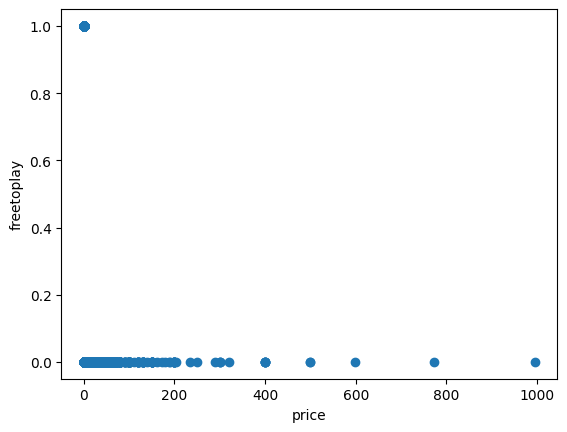

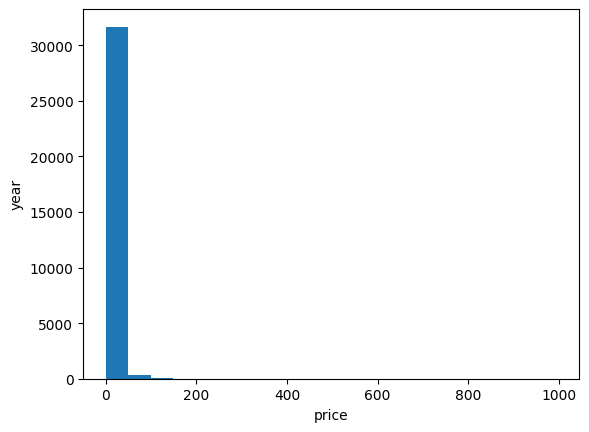

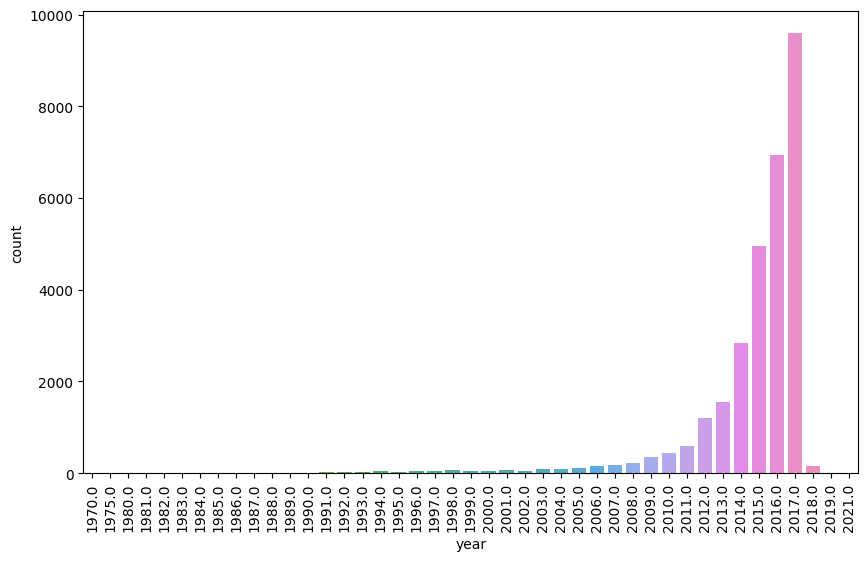

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión
plt.scatter(df['price'], df['freetoplay'])
plt.xlabel('price')
plt.ylabel('freetoplay')
plt.show()

# Histograma
plt.hist(df['price'], bins=20)
plt.xlabel('price')
plt.ylabel('year')
plt.show()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Matriz de correlación precio, y metascore con genero
df_correlacion = df[['price','metascore','year', 'Action', 'Casual', 'Indie', 'Simulation', 'Strategy',
       'Free to Play', 'RPG', 'Sports', 'Adventure', 'Unknown', 'Racing',
       'Early Access', 'Massively Multiplayer',
       'Animation  Modeling', 'Video Production', 'Utilities',
       'Web Publishing', 'Education', 'Software Training',
       'Design  Illustration', 'Audio Production', 'Photo Editing',
       'Accounting','None', 'Mostly Positive', 'Mixed', 'Very Positive',
       'Overwhelmingly Positive', 'Very Negative', 'Positive',
       'Mostly Negative', 'Negative', 'Overwhelmingly Negative', 'early_access']]
correlation_matrix = df_correlacion.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=None)
plt.show()

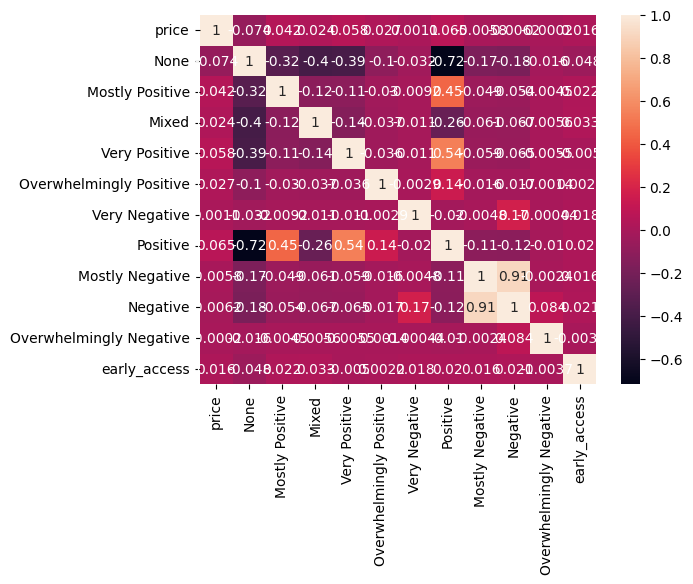

In [172]:
# Matriz de correlación precio, y con sentiment
df_correlacion = df[['price','None', 'Mostly Positive', 'Mixed', 'Very Positive',
       'Overwhelmingly Positive', 'Very Negative', 'Positive',
       'Mostly Negative', 'Negative', 'Overwhelmingly Negative', 'early_access']]
correlation_matrix = df_correlacion.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=None)
plt.show()

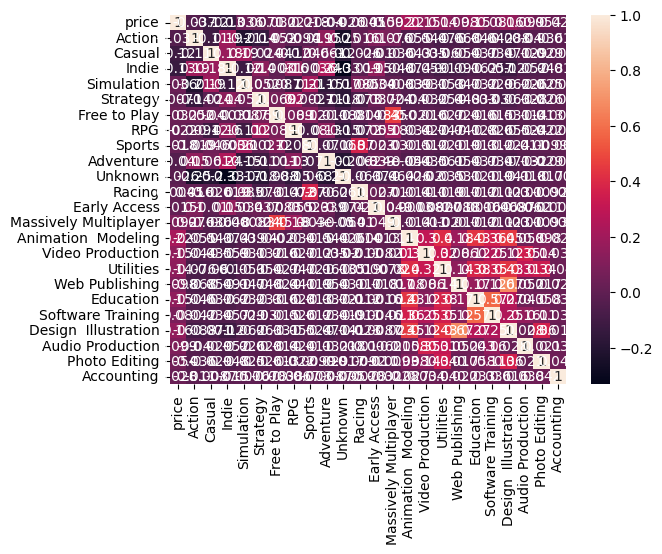

In [170]:
df_correlacion = df[['price','Action', 'Casual', 'Indie', 'Simulation', 'Strategy',
       'Free to Play', 'RPG', 'Sports', 'Adventure', 'Unknown', 'Racing',
       'Early Access', 'Massively Multiplayer',
       'Animation  Modeling', 'Video Production', 'Utilities',
       'Web Publishing', 'Education', 'Software Training',
       'Design  Illustration', 'Audio Production', 'Photo Editing',
       'Accounting']]
correlation_matrix = df_correlacion.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=None)
plt.show()

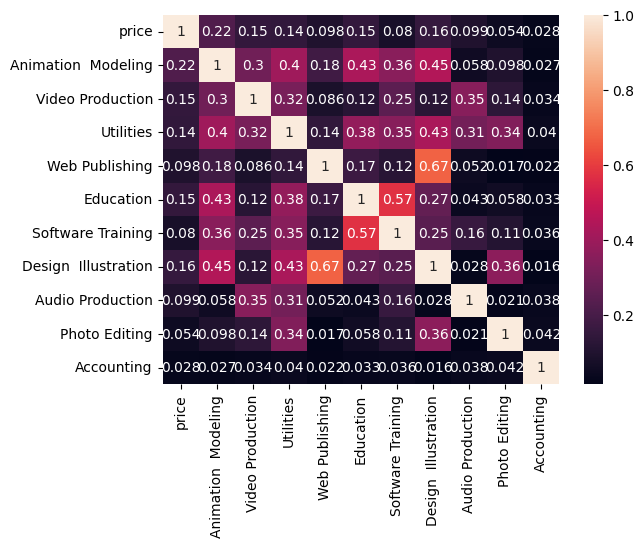

In [171]:
df_correlacion = df[['price',
       'Animation  Modeling', 'Video Production', 'Utilities',
       'Web Publishing', 'Education', 'Software Training',
       'Design  Illustration', 'Audio Production', 'Photo Editing',
       'Accounting']]
correlation_matrix = df_correlacion.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=None)
plt.show()

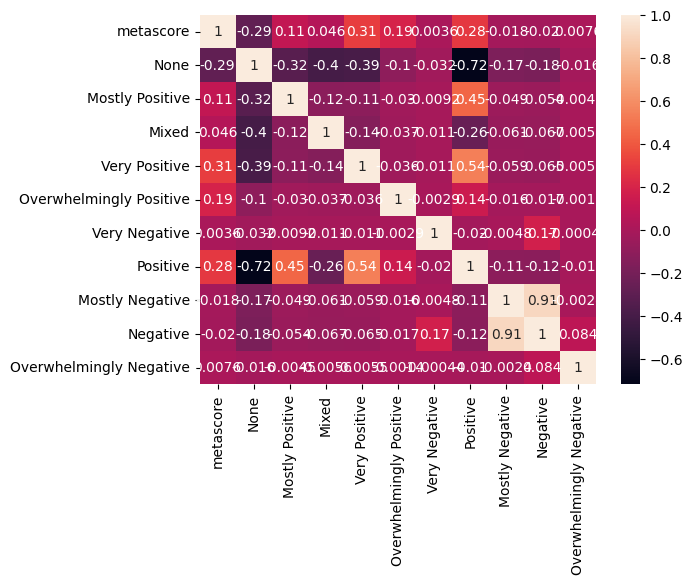

In [174]:
df_correlacion = df[['metascore','None', 'Mostly Positive', 'Mixed', 'Very Positive',
       'Overwhelmingly Positive', 'Very Negative', 'Positive',
       'Mostly Negative', 'Negative', 'Overwhelmingly Negative']]
correlation_matrix = df_correlacion.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=None)
plt.show()

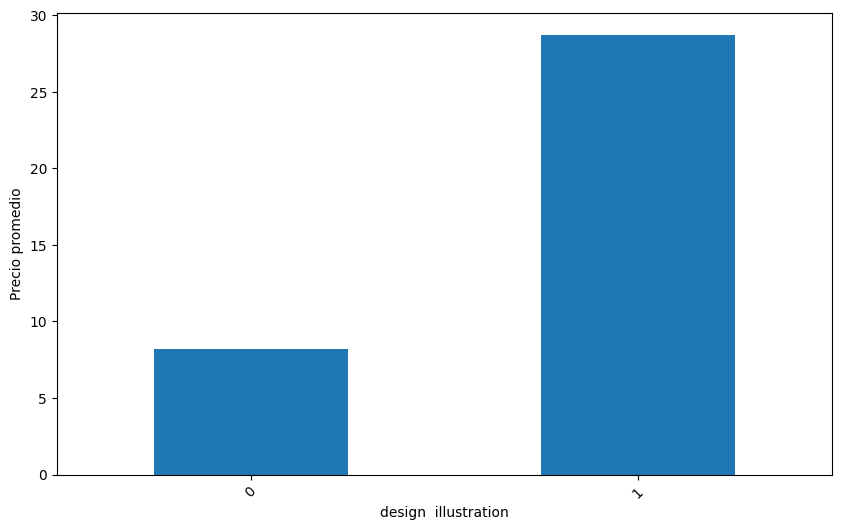

In [179]:
# Agrupación por género y cálculo de estadísticas
df_correlacion = df[['price',
       'Animation  Modeling', 'Video Production', 'Utilities',
       'Web Publishing', 'Education', 'Software Training',
       'Design  Illustration', 'Audio Production', 'Photo Editing',
       'Accounting']]
genre_stats = df_correlacion.groupby('Design  Illustration')['price'].mean()

# Gráfico de barras para mostrar las estadísticas
plt.figure(figsize=(10, 6))
genre_stats.plot(kind='bar')
plt.xlabel('design  illustration')
plt.ylabel('Precio promedio')
plt.xticks(rotation=45)
plt.show()

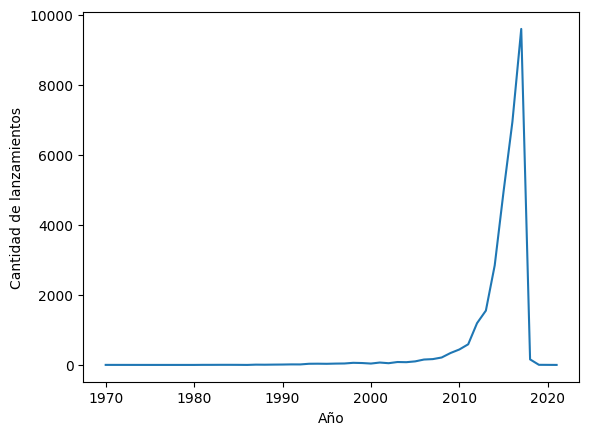

In [180]:
# Temporalidad
# Agrupación por año y recuento de lanzamientos
yearly_counts = df['year'].value_counts().sort_index()

# Gráfico de línea para mostrar la evolución temporal
plt.plot(yearly_counts.index, yearly_counts.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de lanzamientos')
plt.show()

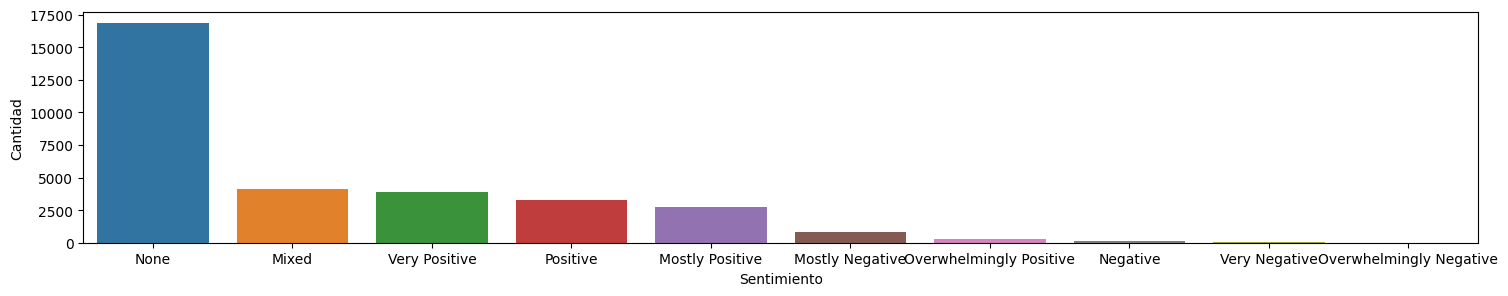

In [184]:
# sentiment
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(18, 3))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

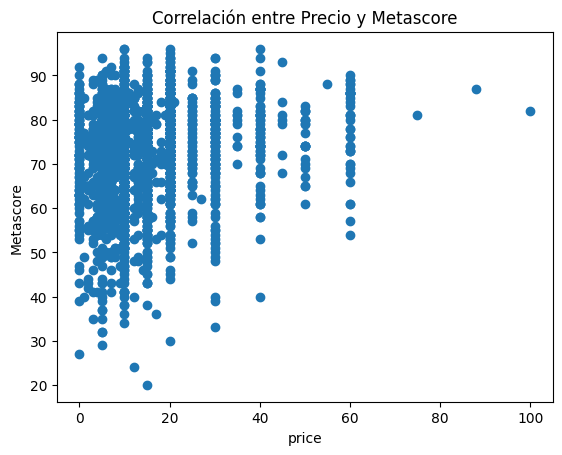

In [202]:
# Preguntas?
# ¿Hay una correlación entre el precio y el puntaje de metascore?
df_solo_metascore = df[df['metascore']>0]
plt.scatter(df_solo_metascore['price'], df_solo_metascore['metascore'])
plt.xlabel('price')
plt.ylabel('Metascore')
plt.title('Correlación entre Precio y Metascore')
plt.show()

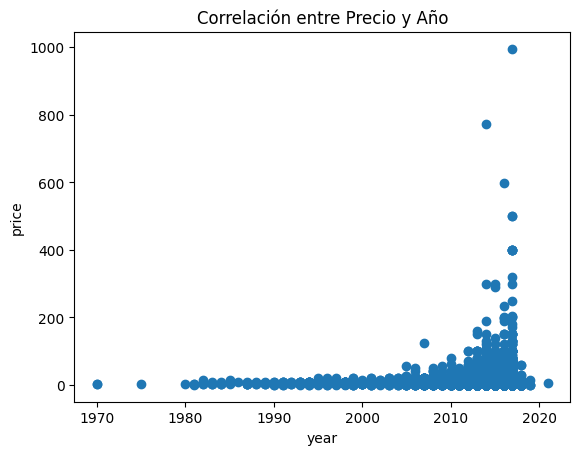

In [235]:
# Preguntas?
# ¿Hay una correlación entre el precio y el anio
df_solo_anio = df[df['year']>0]
plt.scatter(df_solo_anio['year'], df_solo_anio['price'])
plt.xlabel('year')
plt.ylabel('price')
plt.title('Correlación entre Precio y Año')
plt.show()

df_solo_anio[['year','price', 'metascore']].to_csv("Solo_Anio.csv", index=False)

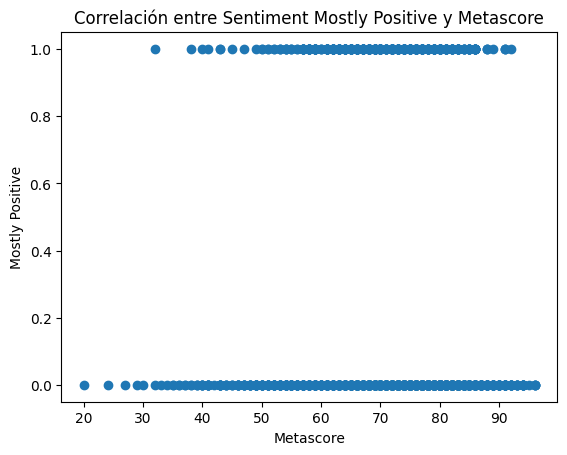

PermissionError: [Errno 13] Permission denied: 'MPositive_Metascore.csv'

In [232]:
# Preguntas?
# ¿Hay una correlación entre el Mostly Positive y el Metascore
df_solo_mostlypos = df[df['metascore']>0]
plt.scatter(df_solo_mostlypos['metascore'], df_solo_mostlypos['Mostly Positive'])
plt.xlabel('Metascore')
plt.ylabel('Mostly Positive')
plt.title('Correlación entre Sentiment Mostly Positive y Metascore')
plt.show()
df_solo_mostlypos[['Mostly Positive','metascore']].to_csv("MPositive_Metascore.csv", index=False)

In [ ]:
#Correlaciones entre metascore y sentiment, solo sentimientos positivos
df_correlacion = df[['metascore','None', 'Mostly Positive', 'Mixed', 'Very Positive',
       'Overwhelmingly Positive', 'Very Negative', 'Positive',
       'Mostly Negative', 'Negative', 'Overwhelmingly Negative']]

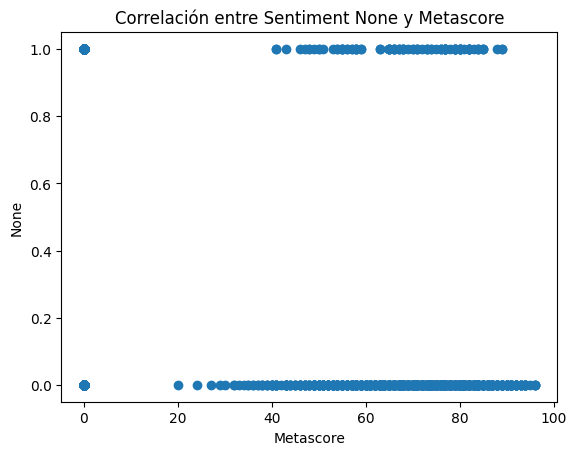

In [214]:
#Correlaciones entre metascore y sentiment, solo sentimientos positivos
df_correlacion = df[['metascore','None']]
plt.scatter(df_correlacion['metascore'], df_correlacion['None'])
plt.xlabel('Metascore')
plt.ylabel('None')
plt.title('Correlación entre Sentiment None y Metascore')
plt.show()

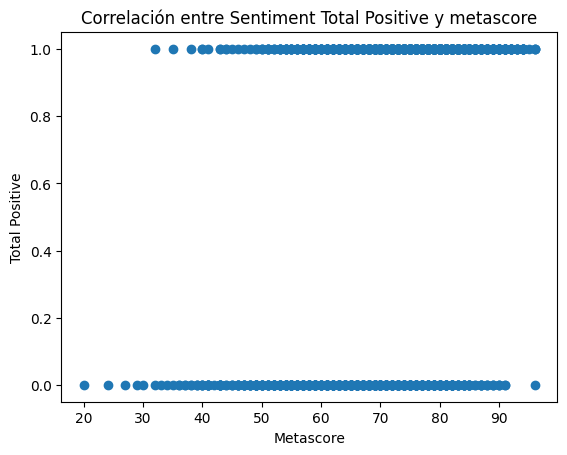

,metascore,Mostly Positive,Mixed,Very Positive,Overwhelmingly Positive,Very Negative,Positive,Mostly Negative,Negative,Overwhelmingly Negative,total_positive
28,96,0,0,0,1,0,1,0,0,0,1
39,84,1,0,0,0,0,1,0,0,0,1
40,80,0,0,1,0,0,1,0,0,0,1
41,76,0,0,1,0,0,1,0,0,0,1
55,70,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
32109,71,0,0,1,0,0,1,0,0,0,1
32112,88,0,0,0,1,0,1,0,0,0,1
32114,79,0,0,1,0,0,1,0,0,0,1
32116,93,0,0,0,1,0,1,0,0,0,1


In [228]:
#Correlaciones entre metascore y sentiment, solo sentimientos positivos
df_correlacion = df[['metascore','Mostly Positive', 'Mixed', 'Very Positive',
       'Overwhelmingly Positive', 'Very Negative', 'Positive',
       'Mostly Negative', 'Negative', 'Overwhelmingly Negative']][df['metascore']>0]
df_correlacion['total_positive'] = df_correlacion['Positive'] + df_correlacion['Overwhelmingly Positive'] + df_correlacion['Mostly Positive'] + df_correlacion['Very Positive']
df_correlacion['total_positive'] = df_correlacion['total_positive'].apply(lambda x: 1 if x > 1 else 0)
plt.scatter(df_correlacion['metascore'], df_correlacion['total_positive'])
plt.xlabel('Metascore')
plt.ylabel('Total Positive')
plt.title('Correlación entre Sentiment Total Positive y metascore')
plt.show()
# parece que no hay correlacion